In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [31]:
data_folder1 = './BeerAdvocate/'

In [32]:
df_beers = pd.read_csv(data_folder1 + 'beers.csv')
df_breweries = pd.read_csv(data_folder1 + 'breweries.csv')
df_users = pd.read_csv(data_folder1 + 'users.csv')
#df_ratings = pd.read_csv(data_folder + 'ratings.csv')

In [21]:
#df_beers.columns = df_beers.iloc[0]
#df_beers = df_beers.drop(index=0).reset_index(drop = True)

Possible problematic: Given informations about a user, how can we determine what his preferences will be? 

In [39]:
df_beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [47]:
df_breweries.columns = ['brewery_id','location','brewery_name','nbr_beers']

In [53]:
df = df_beers.merge(df_breweries[['brewery_id','location','nbr_beers']], left_on='brewery_id', right_on='brewery_id')

In [54]:
df

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,nbr_beers
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Kyrgyzstan,5
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Kyrgyzstan,5
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Kyrgyzstan,5
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Kyrgyzstan,5
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Kyrgyzstan,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN,"United States, Maryland",13
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN,"United States, Maryland",13
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"United States, Maryland",13
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN,"United States, Maryland",13


In [101]:
df.sort_values(by=['avg','nbr_ratings'], ascending=[False,False]).head(60)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,nbr_beers
222521,274598,Red Brixx Ale,28299,Toxic Brewing Co.,American Amber / Red Lager,6,0,5.0,NaN,NaN,4.5,5.0,NaN,0,NaN,"United States, Ohio",59
224191,268214,Big Hefe,38684,Brown Iron Brewhouse,Hefeweizen,5,0,5.0,NaN,NaN,6.8,5.0,2.211576,3,5.0,"United States, Michigan",11
93138,284315,Smile Isle,38209,Captain Fatty's,American IPA,3,0,5.0,NaN,NaN,7.3,5.0,NaN,0,NaN,"United States, California",22
93140,284314,Vibes,38209,Captain Fatty's,American IPA,3,0,5.0,NaN,NaN,6.1,5.0,NaN,0,NaN,"United States, California",22
276531,122104,Tiamat Bourbon Stout,34425,3 Stakes Brewing,American Double / Imperial Stout,3,1,5.0,NaN,NaN,10.0,5.0,NaN,0,NaN,"United States, California",5
25347,133479,Great Lakes Limp Thrust! An ISA,9408,Great Lakes Brewery,American IPA,2,0,5.0,NaN,NaN,4.2,5.0,NaN,0,NaN,Canada,307
65457,262732,Fairy Ale Of New York,35498,Rascals Brewing Company,American IPA,2,1,5.0,NaN,NaN,5.0,5.0,NaN,0,NaN,Ireland,15
73722,161649,Golden Pawn,32382,Jekyll Brewing,American Pale Ale (APA),2,1,5.0,NaN,NaN,NaN,5.0,NaN,0,NaN,"United States, Georgia",28
92159,178957,BA Vanilla Fundamental Observation,33824,Bottle Logic Brewing,American Double / Imperial Stout,2,0,5.0,NaN,NaN,NaN,5.0,NaN,0,NaN,"United States, California",236
93563,281817,Champagne Room,41955,Casa Agria Specialty Ales,American Wild Ale,2,0,5.0,NaN,NaN,5.9,5.0,NaN,0,NaN,"United States, California",62


In [122]:
np.log(df['nbr_ratings'].max())

9.711660965727868

In [115]:
len(df['nbr_ratings'].loc[df['nbr_ratings']==0])

32841

In [116]:
len(df)

280823

<AxesSubplot:>

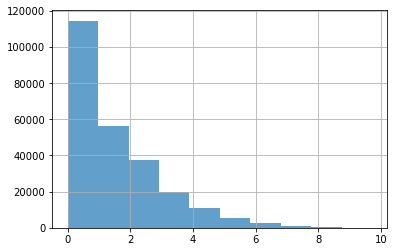

In [111]:
df['nbr_ratings'].loc[df['nbr_ratings']!=0].apply(np.log).hist(alpha=0.7)

<AxesSubplot:>

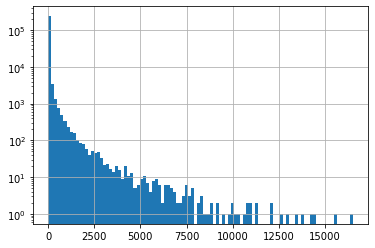

In [113]:
df['nbr_ratings'].loc[df['nbr_ratings']!=0].hist(bins=100,log=True)

In [119]:
df['nbr_ratings'].loc[df['nbr_ratings']!=0].median()

3.0

In [118]:
df['nbr_ratings'].mean()

29.887267068580567

In [123]:
df["weighted_avg"] = np.log(df['nbr_ratings'])*df["avg"]/df["avg"].max()

/Users/lolavegeas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [142]:
df.sort_values(by=['weighted_avg'], ascending=False)[:50]

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,nbr_beers,weighted_avg
197852,16814,Heady Topper,46317,The Alchemist,American Double / Imperial IPA,13426,2379,4.65,100.0,96.0,8.00,4.721026,NaN,0,NaN,"United States, Vermont",27,8.839602
79091,7971,Pliny The Elder,863,Russian River Brewing Company,American Double / Imperial IPA,14436,3690,4.60,100.0,100.0,8.00,4.647832,NaN,0,NaN,"United States, California",108,8.811282
226278,11757,Founders Breakfast Stout,1199,Founders Brewing Company,American Double / Imperial Stout,16509,3811,4.47,99.0,100.0,8.30,4.513760,NaN,0,NaN,"United States, Michigan",399,8.682225
226360,19960,Founders KBS (Kentucky Breakfast Stout),1199,Founders Brewing Company,American Double / Imperial Stout,12599,3221,4.56,100.0,NaN,11.80,4.607697,NaN,0,NaN,"United States, Michigan",399,8.610532
251429,10672,Bourbon County Brand Stout,1146,Goose Island Beer Co.,American Double / Imperial Stout,12193,2952,4.50,100.0,95.0,13.80,4.599114,NaN,0,NaN,"United States, Illinois",869,8.467756
225867,17112,Hopslam Ale,287,"Bell's Brewery, Inc.",American Double / Imperial IPA,13026,3527,4.43,98.0,94.0,10.00,4.462041,NaN,0,NaN,"United States, Michigan",312,8.394587
161559,64228,Zombie Dust,26,3 Floyds Brewing Co.,American Pale Ale (APA),10063,1571,4.53,100.0,NaN,6.20,4.592774,NaN,0,NaN,"United States, Indiana",333,8.350258
95186,29619,Sculpin IPA,199,Ballast Point Brewing Company,American IPA,13835,2489,4.37,97.0,NaN,7.00,4.392372,NaN,0,NaN,"United States, California",444,8.333552
180458,2093,90 Minute IPA,64,Dogfish Head Brewings & Eats,American Double / Imperial IPA,15548,3899,4.24,94.0,96.0,9.00,4.273975,NaN,0,NaN,"United States, Delaware",378,8.184631
262642,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,Quadrupel (Quad),9228,2875,4.47,99.0,98.0,11.30,4.505450,1.099144,2968,4.467780,Belgium,3,8.162218


In [55]:
df_grouped_by_loc = df.groupby("location")

In [63]:
by_country

{'country': 'Albania',
 'nbr_beers': 15,
 'nbr_styles': 8,
 'nbr_breweries': 8,
 'avg_ratings': 2.972142857142857,
 'mean_nbr_ratings': 5.533333333333333}

In [80]:
df_by_country = pd.DataFrame(columns=['country', 'nbr_beers', 'nbr_styles', 'nbr_breweries', 'avg_ratings', 'mean_nbr_ratings'])
for location, group in df_grouped_by_loc:
    by_country = {
        'country': [location],
        'nbr_beers':[len(group)],
        'nbr_styles': [len(np.unique(group["style"]))],
        'nbr_breweries': [len(np.unique(group["brewery_id"]))],
        'avg_ratings': [np.nanmean(group["avg"])],
        'max_ratings': [group["avg"].max()],
        'mean_nbr_ratings': [group["nbr_ratings"].mean()]
    }
    df_by_country = pd.concat([df_by_country, pd.DataFrame(by_country)], axis=0)
    
df_by_country.reset_index(drop=True, inplace=True)

print('The length of the new dataframe is {}'.format(len(df_by_country)))
df_by_country.head()

<ipython-input-80-8f33da9cef89>:8: RuntimeWarning: Mean of empty slice
  'avg_ratings': [np.nanmean(group["avg"])],


The length of the new dataframe is 277


,country,nbr_beers,nbr_styles,nbr_breweries,avg_ratings,mean_nbr_ratings,max_ratings
0,Albania,15,8,8,2.972143,5.533333,3.59
1,Algeria,12,9,5,2.465000,1.416667,3.80
2,Andorra,9,8,1,2.970000,2.888889,3.90
3,Angola,2,1,2,2.940000,3.000000,3.48
4,Antigua & Barbuda,2,1,1,3.060000,25.500000,3.10


In [81]:
df_by_country.sort_values(by=['max_ratings'], ascending=False).head(10)

,country,nbr_beers,nbr_styles,nbr_breweries,avg_ratings,mean_nbr_ratings,max_ratings
209,"United States, Georgia",2227,91,74,3.886260,36.827571,5.0
242,"United States, Texas",5801,102,259,3.744497,26.852612,5.0
231,"United States, New York",11659,103,371,3.821057,39.364439,5.0
232,"United States, North Carolina",7127,101,228,3.845002,16.949628,5.0
234,"United States, Ohio",6270,98,202,3.831616,26.584051,5.0
236,"United States, Oregon",7960,101,260,3.797171,38.648367,5.0
124,Mexico,767,83,148,3.465276,43.455020,5.0
237,"United States, Pennsylvania",13036,102,288,3.796631,26.811215,5.0
120,Malta,28,18,6,3.538571,10.857143,5.0
239,"United States, South Carolina",1866,86,63,3.824174,21.135584,5.0


In [68]:
np.unique(df_by_country["country"])

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua & Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Canada, Alberta', 'Canada, British Columbia', 'Canada, Manitoba',
       'Canada, New Brunswick', 'Canada, Newfoundland and Labrador',
       'Canada, Nova Scotia', 'Canada, Ontario', 'Canada, Quebec',
       'Canada, Saskatchewan', 'Cape Verde Islands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Eritrea', '

In [44]:
df_breweries.head()

,id,location,brewery_name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [36]:
df_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [79]:
df_users_by_loc = pd.DataFrame(columns=['location', 'nbr_users', 'nbr_ratings_mean', 'nbr_reviews_mean'])
for location, group in df_users.groupby("location"):
    users_by_loc= {
        'location': [location],
        'nbr_users':[len(np.unique(group["user_id"]))],
        'nbr_ratings_mean': [group["nbr_ratings"].mean()],
        'nbr_ratings_max': [group["nbr_ratings"].max()],
        'nbr_reviews_mean': [group["nbr_reviews"].mean()],
        'nbr_reviews_max': [group["nbr_reviews"].max()],
        
    }
    df_users_by_loc = pd.concat([df_users_by_loc, pd.DataFrame(users_by_loc)], axis=0)
    
df_users_by_loc.reset_index(drop=True, inplace=True)

print('The length of the new dataframe is {}'.format(len(df_by_country)))
df_users_by_loc.sort_values(by=['nbr_users'], ascending=False).head(10)

The length of the new dataframe is 277


,location,nbr_users,nbr_ratings_mean,nbr_reviews_mean,nbr_ratings_max,nbr_reviews_max
141,"United States, California",11638,56.556109,16.426018,9991.0,8768.0
174,"United States, Pennsylvania",8689,75.272413,23.232133,8098.0,5316.0
168,"United States, New York",7432,66.297094,20.843784,7093.0,6469.0
149,"United States, Illinois",6866,80.528110,19.856976,10180.0,4734.0
157,"United States, Massachusetts",6658,62.210424,19.838390,5314.0,5309.0
179,"United States, Texas",5893,61.830647,14.510606,10302.0,3247.0
171,"United States, Ohio",4776,65.026801,22.365578,3153.0,2766.0
145,"United States, Florida",4604,53.635969,13.915943,5328.0,4376.0
158,"United States, Michigan",4213,57.791123,15.236886,5605.0,5603.0
166,"United States, New Jersey",3716,73.685953,20.838536,10360.0,3470.0


In [72]:
df_users.sort_values(by=['nbr_ratings'], ascending=False).head(10)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
228,12046,7593,sammy.3853,Sammy,1.070276e+09,Canada
1352,10360,66,acurtis.508168,acurtis,1.285582e+09,"United States, New Jersey"
1583,10302,34,texasfan549.572853,Texasfan549,1.298718e+09,"United States, Texas"
969,10180,2091,kylehay2004.571365,kylehay2004,1.298459e+09,"United States, Illinois"
994,9991,1122,grg1313.288024,GRG1313,1.232017e+09,"United States, California"
9,9987,16,jaydoc.265507,jaydoc,1.226488e+09,"United States, Kansas"
967,9944,8768,uclabrewn84.439438,UCLABrewN84,1.268910e+09,"United States, California"
672,9520,51,spycow.205702,spycow,1.206270e+09,"United States, Illinois"
1286,8970,8970,stonedtrippin.601042,StonedTrippin,1.306577e+09,"United States, Colorado"
516,8898,0,kjkinsey.472192,kjkinsey,1.277201e+09,"United States, Texas"


In [73]:
df_users.sort_values(by=['nbr_reviews'], ascending=False).head(10)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
1286,8970,8970,stonedtrippin.601042,StonedTrippin,1.306577e+09,"United States, Colorado"
967,9944,8768,uclabrewn84.439438,UCLABrewN84,1.268910e+09,"United States, California"
228,12046,7593,sammy.3853,Sammy,1.070276e+09,Canada
216,6778,6778,beerchitect.14442,BEERchitect,1.107947e+09,"United States, Kentucky"
184,6616,6616,biboergosum.168458,biboergosum,1.193569e+09,Canada
89,7093,6469,metter98.95017,metter98,1.156846e+09,"United States, New York"
21,6306,6306,brentk56.6284,brentk56,1.084442e+09,"United States, North Carolina"
413,6185,6185,phyl21ca.2335,Phyl21ca,1.056622e+09,Canada
1053,5605,5603,superspak.456300,superspak,1.273054e+09,"United States, Michigan"
857,5319,5316,nerofiddled.526,NeroFiddled,1.026122e+09,"United States, Pennsylvania"


In [138]:
df_users["joined"].max()

1501495200.0

How to quantify experience? (nbr of ratings + nbr of reviews + avg length of reviews)?

In [87]:
with open(data_folder1+'reviews.txt', 'r', encoding='iso-8859-1') as f:
    reviews = f.readlines()

In [141]:
reviews[:20]

['beer_name: RÃ©gab\n',
 'beer_id: 142544\n',
 'brewery_name: Societe des Brasseries du Gabon (SOBRAGA)\n',
 'brewery_id: 37262\n',
 'style: Euro Pale Lager\n',
 'abv: 4.5\n',
 'date: 1440064800\n',
 'user_name: nmann08\n',
 'user_id: nmann08.184925\n',
 'appearance: 3.25\n',
 'aroma: 2.75\n',
 'palate: 3.25\n',
 'taste: 2.75\n',
 'overall: 3.0\n',
 'rating: 2.88\n',
 'text: From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse.\n',
 '\n',
 'beer_name: Barelegs Brew\n',
 'beer_id: 19590\n',
 'brewery_name: Strangford Lough Brewing Company Ltd\n']